In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfPlayers = pd.read_csv("../nba_championship_rings/data/allChPlayer.csv")
dfTeams = pd.read_csv("../nba_championship_rings/data/chDf.csv")

dfRuPlayers = pd.read_csv("../nba_championship_rings/data/allRuPlayer.csv")
dfRuTeams = pd.read_csv("../nba_championship_rings/data/ruDf.csv")

dfTeams["avg_age"] = dfTeams.apply(lambda x: dfPlayers[(dfPlayers["TeamID"] == x["team_id"]) & (dfPlayers["SEASON_ID"] == x["season"])]["AGE"].mean()  ,axis = 1)
dfRuTeams["avg_age"] = dfRuTeams.apply(lambda x: dfRuPlayers[(dfRuPlayers["TeamID"] == x["team_id"]) & (dfRuPlayers["SEASON_ID"] == x["season"])]["AGE"].mean()  ,axis = 1)

C:\Users\Peter\AppData\Local\Temp\ipykernel_9084\1771933381.py:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(-0.5,63,5)


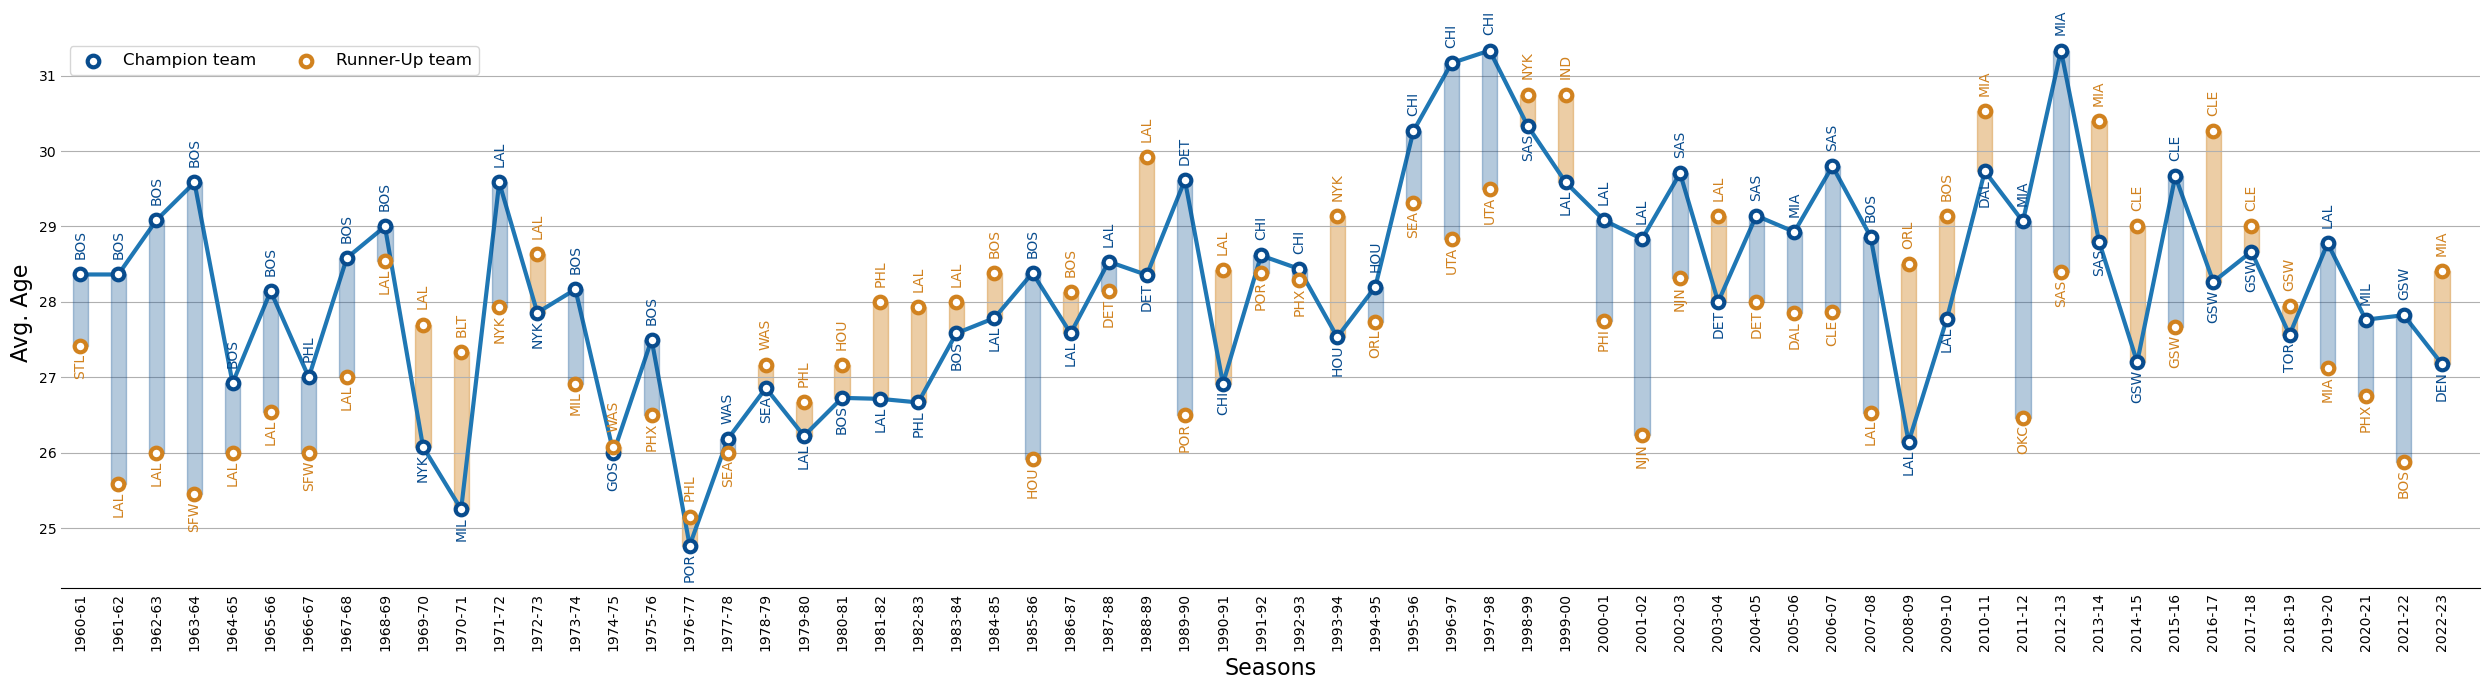

In [7]:
chValues = dfTeams["avg_age"].to_list()
ruValues = dfRuTeams["avg_age"].to_list()

chAbv = dfTeams["team_abv"].to_list()
ruAbv = dfRuTeams["team_abv"].to_list()

chColor = "#084C8E"
ruColor = '#D1821F'

xlabels = dfTeams["season"].to_list()

fig, ax = plt.subplots(figsize = (25,7))

ax.plot(range(len(chValues)), chValues, zorder = 2, linewidth = 3)
ax.scatter(range(len(chValues)), chValues, zorder = 6, color = "white", edgecolor = chColor, s = 70, label = "Champion team", linewidth = 3)

#ax.plot(range(len(dfTeams)), dfRuTeams["avg_age"].to_list(), zorder = 5, linestyle = "dashed")
ax.scatter(range(len(ruValues)), ruValues, zorder = 6, color = "white", edgecolor = ruColor, s = 70, label = "Runner-Up team", linewidth = 3)

for i in range(len(chValues)):
    if chValues[i] > ruValues[i]:
        pass
        ax.fill_between(x = [i-0.2,i+0.2], y1 = min([chValues[i],ruValues[i]]), y2 = max([chValues[i],ruValues[i]]), color = chColor, alpha = 0.3, zorder = 5)
    else:
        ax.fill_between(x = [i-0.2,i+0.2], y1 = min([chValues[i],ruValues[i]]), y2 = max([chValues[i],ruValues[i]]), color = ruColor, alpha = 0.4)

for i in range(len(chAbv)):
    if chValues[i] > ruValues[i]:
        yValues = [chValues[i] + 0.2, ruValues[i] - 0.1, "bottom", "top"]
    else:
        yValues = [chValues[i] - 0.1, ruValues[i] + 0.2, "top", "bottom"]
    
    ax.text(x = i, y = yValues[0], s = chAbv[i], rotation = 90, color = chColor, ha = "center", va = yValues[2])
    ax.text(x = i, y = yValues[1], s = ruAbv[i], rotation = 90, color = ruColor, ha = "center", va = yValues[3])
        

plt.xticks(ticks=range(len(xlabels)), labels=xlabels,rotation = 90)

plt.ylabel("Avg. Age", fontsize = 16)
plt.xlabel("Seasons", fontsize = 16)

ax.set_xlim(-0.5,63,5)
ax.set_ylim(24.2, 31.5)

ax.grid(axis = "y", zorder = 1)

plt.legend(fontsize = 12, ncol = 2)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("nba_avg_age.png", dpi = 200)

plt.show()
